In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# ---------------------- preparing DATAS -------------------------------------------
np.random.seed(0)

n_pts = 500 # number of points

bias = np.ones(n_pts) # bias input

X_top_region = np.array([    
    np.random.normal(13, 2, n_pts), # random points x
    np.random.normal(12, 2, n_pts),  # random points y
]).T # transpose

X_bottom_region = np.array([
    np.random.normal(8, 2, n_pts), # random points x
    np.random.normal(6, 2, n_pts),  # random points y
]).T # transpose

In [43]:
# X as training datas
X = np.vstack((X_top_region, X_bottom_region)) 

X

array([[16.52810469, 12.76546486],
       [13.80031442, 11.93151544],
       [14.95747597, 14.19269369],
       ...,
       [ 7.50641288,  6.31686769],
       [ 5.84131367,  3.71619716],
       [ 7.7715489 ,  3.37805926]])

In [44]:
# y as labels
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
y

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [45]:
X[:n_pts, 0] # first half the data x
# X[:n_pts, 1] # first half the data y
# X[n_pts:, 0] # second half the data x 
# X[n_pts:, 1] # second half the data y

array([16.52810469, 13.80031442, 14.95747597, 17.4817864 , 16.73511598,
       11.04544424, 14.90017684, 12.69728558, 12.7935623 , 13.821197  ,
       13.28808714, 15.90854701, 14.52207545, 13.24335003, 13.88772647,
       13.66734865, 15.98815815, 12.58968347, 13.6261354 , 11.29180852,
        7.89402037, 14.30723719, 14.7288724 , 11.51566996, 17.53950925,
       10.09126865, 13.09151703, 12.6256323 , 16.06555843, 15.93871754,
       13.30989485, 13.75632504, 11.2244285 ,  9.03840706, 12.3041757 ,
       13.31269794, 15.46058136, 15.4047597 , 12.22534637, 12.3953945 ,
       10.90289407, 10.15996413,  9.58745962, 16.90155079, 11.98069564,
       12.1238514 , 10.49440928, 14.55498071,  9.7722043 , 12.57451944,
       11.20906688, 13.773805  , 11.97838972, 10.63873563, 12.94363554,
       13.85666374, 13.13303444, 13.6049438 , 11.73135581, 12.27451767,
       11.6550791 , 12.28089368, 11.37370744,  9.5474348 , 13.35485228,
       12.19643813,  9.73960331, 13.92556451, 11.18540327, 13.10

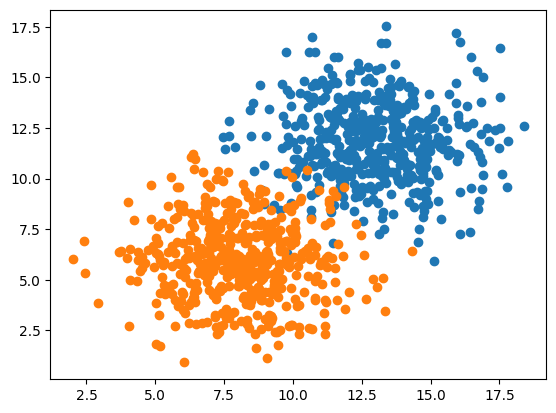

In [46]:
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1]);

In [47]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
from keras import Input

In [48]:
# create a perceptron for LINEAR MODEL

model = Sequential()

# input layer
inputLayer = Input(
    shape=(2,) # input has 2 nodes for x1, x2 
)

# since we only have one output layer which product a single output
outputLayer = Dense(
    units=1,
    activation='sigmoid',
)

# our perceptron
model.add(inputLayer)
model.add(outputLayer)
model.compile(
    # Adam optimizer is one of many optimization algorithm 
    # this algorithm is a combination of the two: Adagrad and RMSprop
    # which are stochastic gradient descent
    # what gradient descent we implimented earlier in tut_simplePerceptron.py is batch gradient descent
    # which take whole points just to calculate gradient (derivative)
    # what happens if there are million of points !!! --> use Adam
    optimizer=Adam(learning_rate=0.1),
    
    # error, loss function : Calculates how often predictions equal labels.
    # https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy 
    # we can use the name of the class tf.keras.losses.BinaryCrossentropy as string
    # and put it like above, but we can also put in the new object of the class like in the optimizer
    loss='binary_crossentropy', 
    
    # a metric is very similar to a loss function
    # but they are not used to train the model
    # it show the PERFORMANCE of every epoch
    # --> it calculates how often predictions equal labels: 
    # 0.95 means 95% of accuracy (preds match labels)
    metrics=['accuracy']
)

In [49]:
# training our model

model_history = model.fit(
    x=X,
    y=y,
    verbose=1, # Verbosity mode. 0 = silent, 1 = progress bar, 2 = single line. --> just to print out the training process
    batch_size=50, # if have 1000 data points / 50 samples = 20 iterations to cover all the dataset in ONE epoch, each iteration will change the weights 
    epochs=500, # cover all the datasets, also not to be underfitting
    shuffle='true' 
    # shuffle training datas before each epoch
    # shuffle the rows in your training datas, 
    # this helps your gradient descent get to GLOBAL MINIMUM (the lowest minimum -> least error) by simply shuffling
    # because most of the time, your gradent can be stucked to LOCAL MINIMUM (not the best minimum -> stuck at some error)
)   

Epoch 1/500
20/20 [==============================] - 0s 3ms/step - loss: 1.2697 - accuracy: 0.5600
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 0.5577 - accuracy: 0.7070
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4414 - accuracy: 0.8480
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8690
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.9110
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.9260
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.9450
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.9530
Epoch 9/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2352 - accuracy: 0.9480
Epoch 10/500
20/20 [==============================] - 0s 4ms/step - loss: 0.2209 - accuracy: 0.9590
Epoch 11/

In [50]:
# ploting the accuracy value of 500 epoches on the plot
model_history.history['accuracy']

[0.5600000023841858,
 0.7070000171661377,
 0.8479999899864197,
 0.8690000176429749,
 0.9110000133514404,
 0.9259999990463257,
 0.9449999928474426,
 0.953000009059906,
 0.9480000138282776,
 0.9589999914169312,
 0.9539999961853027,
 0.9620000123977661,
 0.9660000205039978,
 0.9649999737739563,
 0.968999981880188,
 0.9710000157356262,
 0.9670000076293945,
 0.9710000157356262,
 0.972000002861023,
 0.9670000076293945,
 0.972000002861023,
 0.9779999852180481,
 0.9729999899864197,
 0.9729999899864197,
 0.9789999723434448,
 0.9769999980926514,
 0.9769999980926514,
 0.9750000238418579,
 0.9760000109672546,
 0.9779999852180481,
 0.9779999852180481,
 0.9779999852180481,
 0.9729999899864197,
 0.9760000109672546,
 0.9779999852180481,
 0.9769999980926514,
 0.9760000109672546,
 0.9779999852180481,
 0.9779999852180481,
 0.9739999771118164,
 0.9750000238418579,
 0.9779999852180481,
 0.9769999980926514,
 0.9779999852180481,
 0.9710000157356262,
 0.9739999771118164,
 0.9769999980926514,
 0.97600001096725

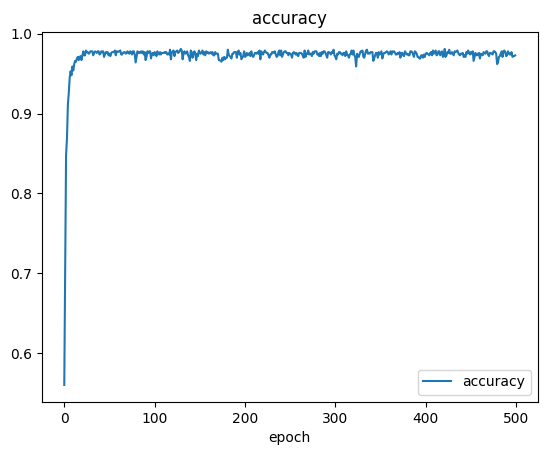

In [51]:
plt.plot(model_history.history['accuracy']) # there are 500 elements (500 epoches) in this array
plt.xlabel('epoch') # so the x axis will automatically set to 500 as number of elements
plt.title('accuracy')
plt.legend(['accuracy'])

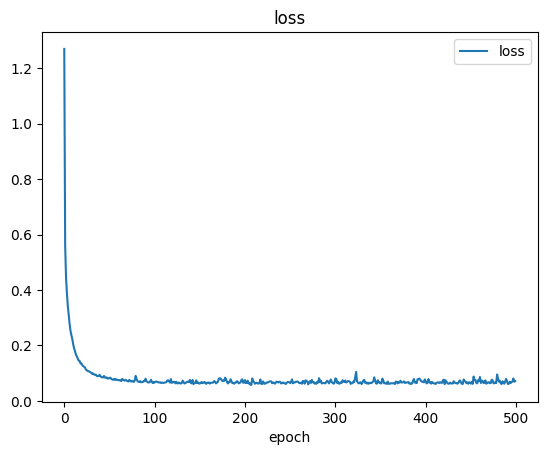

In [52]:
plt.plot(model_history.history['loss']) # there are 500 elements (500 epoches) in this array
plt.xlabel('epoch') # so the x axis will automatically set to 500 as number of elements
plt.title('loss')
plt.legend(['loss'])

In [53]:
 # we see that we don't have to do 500 epoches, loss at epoch 100 is pretty minimal 

1/1 [==============================] - 0s 22ms/step


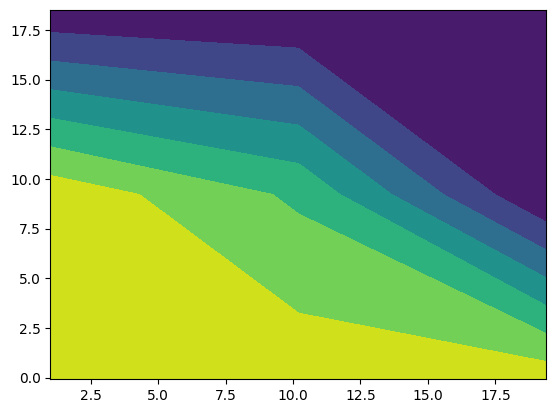

In [65]:
# drawing the line according to the trained model --------- testing
# we're gonna test with 3 by 3 meshgrid first to understand the process

def plot_decision_boundary_test(X, y, model):
    # 2d grid needs x and y coordinates
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 3)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 3)
    xx, yy = np.meshgrid(x_span, y_span)

    # show the grid coordinates
    # print('xx: \n', xx) # imagine x axis horizontally 
    # print('yy: \n', yy) # imagine y axis vertically

    # the grid is formed when we imagine placsing yy on top of xx 
    # --> 2d grid with x and y axis

    # getting grid points from 2d above grid in the form of [x, y]
    xx_flatten = xx.ravel()
    yy_flatten = yy.ravel()
    # print('xx_: \n', xx_flatten) 
    # print('yy_: \n', yy_flatten) 
    
    grid_points = np.c_[xx_flatten, yy_flatten] #  concatenation
    # print('\n grid points: \n', grid_points)

    # grid points as inputs into our trained model
    pred = model.predict(grid_points)

    # print('\n pred: \n', pred) # prediction score from sigmoid function 

    # drawing colours
    # reshape prediction scores according to the grid size to display later
    zz = pred.reshape(xx.shape)
    # print(zz)

    # now we display z score onto grid-like plot
    plt.contourf(xx, yy, zz)



plot_decision_boundary_test(X, y, model)

1/1 [==============================] - 0s 18ms/step
prediction is:  [[0.449732]]


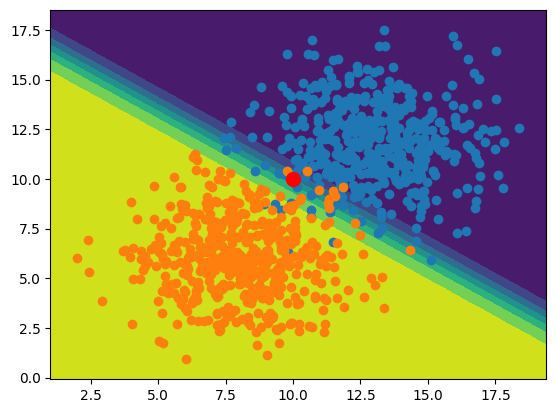

In [73]:
# now we move on to the real function with 50x50 grid to display the linear model (trained model)

def plot_decision_boundary(X, y, model):
    # 2d grid needs x and y coordinates
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)

    xx_flatten = xx.ravel()
    yy_flatten = yy.ravel()
    
    grid_points = np.c_[xx_flatten, yy_flatten] #  concatenation
    pred = model.predict(grid_points)
    zz = pred.reshape(xx.shape)
    plt.contourf(xx, yy, zz)



plot_decision_boundary(X, y, model)

# now we have the line (trained model) that successfully classifies red and blue
# the color on the grid shows the value of propability that was predicted
# the totally blue = 0 (pro)
# totally red = 1
# middle color ~~ 0.5 (more info on sigmoid function)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

# now a little step, we define a new point and predict to show it on the plot

x = 10
y = 10
a_point = [x, y]
pred = model.predict(np.array([a_point]))
plt.plot([x], [y], marker='o', markersize=10, color='red')
print('prediction is: ', pred)

